## 匯入套件

In [1]:
# 匯入keras
from tensorflow import keras
 
# 以下為做DNN常引入的重要模組
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
 
import pandas as pd # 資料處理套件
import matplotlib.pyplot as plt # 繪圖套件

## 讀入資料、處理

In [2]:
# 讀入資料集 - "grades.csv" (在首頁連結第 2 階段課程其他資料：https://drive.google.com/drive/u/1/folders/1KFEBnGxpEWBSai8HnXkNrzvziKgsQbe8)
# 原始資料檔已經有欄位標籤，不須要另外加上
data0 = pd.read_csv('grades.csv')
print("欄:", len(data0.columns))
print("列:", len(data0))

欄: 33
列: 395


In [3]:
# 非數字資料編碼成數字 (one-hot encoding: https://medium.com/@PatHuang/初學python手記-3-資料前處理-label-encoding-one-hot-encoding-85c983d63f87)
data = pd.get_dummies (data0)
print("原來有哪些欄位")
print(data0.columns)
print("One-hot encoding 後的欄位")
print(data.columns)
print("例如原來 shcool 欄位本有哪些值")
print(data0.school)

原來有哪些欄位
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'Tech', 'Math', 'Eng'],
      dtype='object')
One-hot encoding 後的欄位
Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'Tech',
       'Math', 'Eng', 'school_大同', 'school_松山', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',


```
data_df.drop(['Tech','Math','Eng'], axis=1)
```
會回傳捨去 'Tech','Math','Eng' 三個欄位的資料
```
data[['Tech','Math','Eng']]
```
會取得 'Tech','Math','Eng' 三個欄位的資料

In [49]:
# 分割測試、訓練資料
train_i, test_i, train_o, test_o = train_test_split (
    data.drop(['Tech','Math','Eng'], axis=1),     # 特徵
    data[['Tech','Math','Eng']],   # 結果
    test_size = 0.3  #測試資料占 1/5
)

## 類神經網路模型建構與訓練

In [50]:
#模型初始化
model = Sequential()
#類神經網路建構
model.add(Dense(20, input_dim=len(train_i.columns)))

model.add(Dense(13,activation="swish"))
model.add(Dense(12,activation="swish"))
model.add(Dense(10,activation="swish"))
model.add(Dense(8,activation="swish"))
model.add(Dense(5,activation="swish"))

model.add(Dense(3))

In [51]:
#類神經網路編譯
model.compile(loss="mse", optimizer='adam')

In [ ]:
#類神經網路視覺化
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

In [52]:
#模型訓練
history = model.fit(train_i,train_o,    #輸入與輸出
  epochs = 70,      #迭代數
  verbose = 1,      #顯示訓練過程
  validation_split = 0.3, #驗證資料分割比例
)

Epoch 1/70
7/7 [==============================] - 1s 31ms/step - loss: 127.1083 - val_loss: 116.2040
Epoch 2/70
7/7 [==============================] - 0s 5ms/step - loss: 115.2926 - val_loss: 103.3845
Epoch 3/70
7/7 [==============================] - 0s 4ms/step - loss: 102.0661 - val_loss: 91.0682
Epoch 4/70
7/7 [==============================] - 0s 4ms/step - loss: 89.7226 - val_loss: 80.7893
Epoch 5/70
7/7 [==============================] - 0s 4ms/step - loss: 78.9857 - val_loss: 73.0804
Epoch 6/70
7/7 [==============================] - 0s 4ms/step - loss: 71.5782 - val_loss: 66.8882
Epoch 7/70
7/7 [==============================] - 0s 4ms/step - loss: 65.4352 - val_loss: 62.1964
Epoch 8/70
7/7 [==============================] - 0s 4ms/step - loss: 61.2088 - val_loss: 59.0652
Epoch 9/70
7/7 [==============================] - 0s 5ms/step - loss: 57.7571 - val_loss: 55.7813
Epoch 10/70
7/7 [==============================] - 0s 5ms/step - loss: 54.5424 - val_loss: 52.6511
Epoch 11/70
7

## 結果與評估

<code>model.evaluate (*input*, *ex_output*)</code><br><br>
先以 *input* 為輸入用訓練好的 model 做推論，然後和 *ex_output* (期望正確的輸出) 做比較，算出誤差後回傳

In [53]:
# 訓練結果評估
train_result = model.evaluate(train_i, train_o)
test_result = model.evaluate(test_i, test_o)
print("-----------")
print("train loss:", train_result)
print("test loss:", test_result)

4/4 [==============================] - 0s 2ms/step - loss: 12.5114
-----------
train loss: 12.364471435546875
test loss: 12.511361122131348


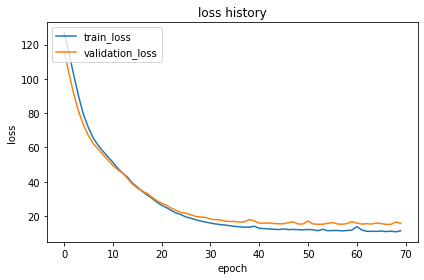

In [54]:
# 訓練過程 (損失) 誤差變化
 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel("loss")
plt.title("loss history")
plt.legend(['train_loss', 'validation_loss'], loc = 'upper left')
plt.xlabel("epoch")
 
plt.tight_layout()
plt.show()

***繪製某科成績的推論結果分佈***

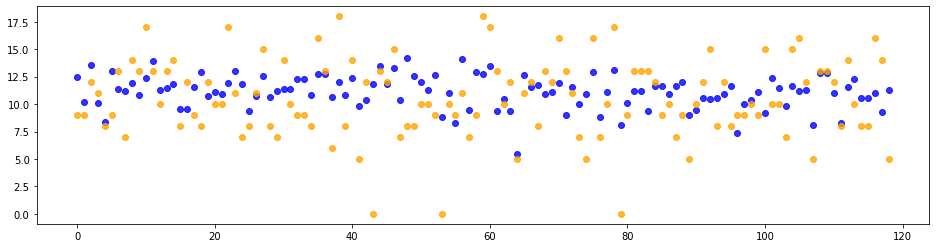

In [55]:
# 設定圖的尺寸
plt.figure(figsize=(16, 4)) # 寬, 高

# 取得測試資料的推論結果
inference_o = model.predict(test_i) # inference_o 會是一個 numpy (二維) 陣列 (np_array)
# 繪製推論結果
plt.scatter(list(range(len(inference_o))), inference_o[:, 1], c="blue", alpha=0.8)
# 繪製原來正確結果
plt.scatter(list(range(len(test_o))), test_o['Math'], c="orange", alpha=0.8)

# 誤差
# plt.scatter(list(range(len(test_o))), abs(inference_o[:, 1] - test_o['Math']), c="red", alpha=0.3)

plt.show ()

如果 inference_o 是一個 np_array<br>
<code>inference \[:,0\]</code> 是 0 那一欄所有 (:) 列的內容 

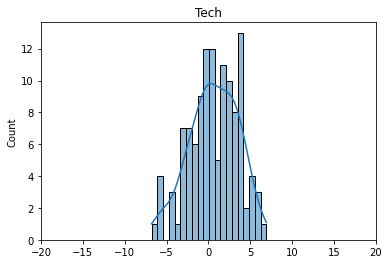

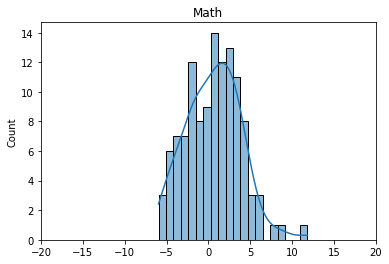

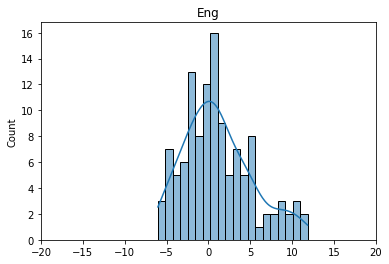

In [57]:
# 推論結果偏離分佈直方圖
import seaborn as sns

for i, j in zip ([0,1,2], ['Tech','Math','Eng']):
  error = inference_o[:,i] - test_o[j].to_numpy() # ... 換成測試集原來正確結果的變數名稱
  # 推論結果偏離直方圖
  sns.histplot(error, kde=True, bins=20)
  plt.xlim(-20, 20)
  plt.title(j)
  plt.show()
